In [1]:
import numpy as np
capital = 1000
fee_rate_open = 0.0001
fee_rate_close = 0.00138


class account:
    
    def __init__(self, capital,fee_rate_open, fee_rate_close): 
        self.fund = []
        self.fr_open = fee_rate_open
        self.fr_close = fee_rate_close
        self.return_rate = []
        
    def change_position(self,signal):        
        first_open = np.where(np.array(signal) == 1)[0][0]
        self.fund.extend((np.ones(first_open)* capital).tolist())
        self.fund.append(capital - price_list[first_open] * (1 + 0.0001))
        self.fund.extend(np.zeros(len(signal)-first_open))
        
        for i in range(first_open+1,len(signal)-1):
            global price 
            price = price_list[i]
            if signal[i] == 1:             
                self.fund[i] = self.fund[i-1] - price * (1 + self.fr_open)
            elif signal[i] == -1: 
                self.fund[i] = self.fund[i-1] + price * (1 - self.fr_close)
            else:
                self.fund[i] = self.fund[i-1]
        return self.fund
    
    def performance(self, signal):
        import matplotlib.pyplot as plt
        
        # 持有基金价值
        plt.plot(self.fund)
        plt.xlabel("Date")
        plt.ylabel("value") 
        plt.title("Value of Fund")
        plt.show()
        
        # 基金收益率
        for i in range(1,len(signal)-1):
            self.return_rate.append((self.fund[i] - self.fund[i-1])/ self.fund[i-1])
        plt.plot(self.return_rate)
        plt.xlabel("Date")
        plt.ylabel("yields") 
        plt.title("Yields of Fund")
        plt.show()
    
        # 其他指标
        import numpy as np
        print('Number of Transactions：', np.size(np.nonzero(signal)))
        rr = (self.fund[len(signal)-2] - self.fund[0]) / self.fund[0]
        print('Rate of return: {:.2%}'.format(rr))
        print('Sharp Ratio：', '%.2f' %((rr - 0.01) / np.std(self.return_rate)))

In [22]:
# 随机生成signal和price_list
import random
day = 60
signal = []
price_list = []
for i in range(day):
    signal.append(random.choice([-1,0,1]))
    price_list.append(100 * random.uniform(0.8,1))

if np.where(np.array(signal) == -1)[0][0] < np.where(np.array(signal) == 1)[0][0] : 
    signal[0:np.where(np.array(signal) == 1)[0][0]] = np.zeros(np.where(np.array(signal) == -1)[0][0])

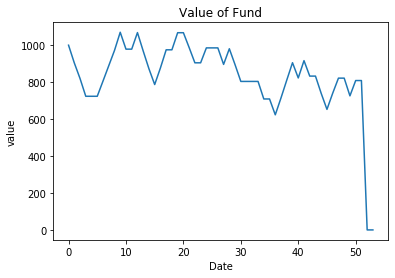

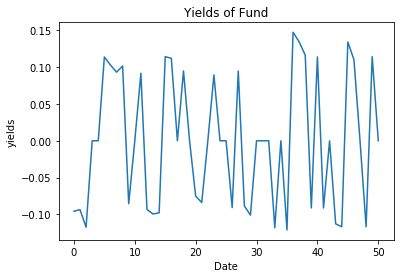

Number of Transactions： 37
Rate of return: -19.13%
Sharp Ratio： -2.26


In [23]:
a = account(1000,0.0001,0.00138)
a.change_position(signal)
a.performance(signal)